Suy tim (heart failure) là một trong những bệnh lý tim mạch nguy hiểm nhất, gây ra hàng
triệu ca tử vong mỗi năm trên toàn cầu và đang trở thành gánh nặng y tế công cộng ngày càng
nghiêm trọng. Theo Tổ chức Y tế Thế giới (WHO), suy tim không chỉ làm giảm chất lượng cuộc
sống mà còn gia tăng đáng kể chi phí điều trị và tỷ lệ tái nhập viện. Việc nhận diện sớm các yếu
tố nguy cơ và dự đoán chính xác khả năng xảy ra suy tim ở từng cá nhân là yếu tố then chốt để
can thiệp kịp thời, giảm thiểu biến chứng và cải thiện tiên lượng bệnh.

Trong nghiên cứu này, nhóm đã sử dụng tập dữ liệu cardio_train.csv – một bộ dữ liệu lớn
với 70.000 bản ghi lâm sàng được thu thập từ các bệnh nhân tại nhiều cơ sở y tế, bao gồm đầy
đủ các thông tin về nhân khẩu học, chỉ số sinh lý, thói quen sinh hoạt và tình trạng bệnh tim
mạch (cardiovascular disease – CVD).

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/cardio_train.csv')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Để thực nghiệm phân tích dựa trên chủ đề này, nhóm đã thực hiện việc thu thập *70000* entry về các
ca suy tim từ các bệnh viện công cộng và các yếu tố liên quan tới các ca bệnh trên.

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


**Kiểm tra dữ liệu bị thiếu**

In [41]:
data.isnull().sum() / data.shape[0] * 100

,0
id,0.0
age,0.0
gender,0.0
height,0.0
weight,0.0
ap_hi,0.0
ap_lo,0.0
cholesterol,0.0
gluc,0.0
smoke,0.0


**Kết luận:** Dữ liệu đầy đủ.

In [42]:
data.nunique()

,0
id,70000
age,8076
gender,2
height,109
weight,287
ap_hi,153
ap_lo,157
cholesterol,3
gluc,3
smoke,2


# **Import Bonus Library**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# **Import Model ML**

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# **Data Processing**


**1. Delete unnecessary data (eg: id...)**

In [47]:
if 'id' in data.columns:
    data = data.drop(columns=['id'])

**2. Add age (years) and BMI columns**

In [48]:
data['age_years'] = (data['age'] / 365).astype(int)
data['bmi'] = data['weight'] / ((data['height']/100) ** 2)

**3. Remove outliers using IQR**

In [49]:
def remove_outliers_iqr(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Applying IQR for suitable columns (eg: height, weight, bmi,...)
cols_iqr = ['height', 'weight', 'bmi']
for col in cols_iqr:
    data = remove_outliers_iqr(data, col, factor=1.5)   # factor=1.5 is standard

**4. Combined with hard-threshold for blood pressure**

In [67]:
data = data[(data['ap_hi'] > 0) & (data['ap_hi'] <= 200)]
data = data[(data['ap_lo'] > 0) & (data['ap_lo'] <= 150)]
data = data[data['ap_hi'] >= data['ap_lo']]

print(f"Number of rows after processing: {data.shape}  (from 70,000)")
data.describe()


Number of rows after processing: (65230, 14)  (from 70,000)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,65230.000000,65230.000000,65230.000000,65230.000000,65230.000000,65230.000000,65230.000000,65230.000000,65230.000000,65230.000000,65230.000000,65230.000000,65230.000000,65230.000000
mean,19451.730553,1.351019,164.471700,72.509453,126.127549,81.013307,1.351924,1.217400,0.087782,0.052507,0.804599,0.485497,52.793500,26.822662
std,2470.433270,0.477293,7.502512,11.951164,16.246695,9.367554,0.668808,0.563333,0.282979,0.223048,0.396512,0.499793,6.775455,4.229729
min,10798.000000,1.000000,143.000000,40.000000,16.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,15.035584
25%,17640.000000,1.000000,159.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.795360
50%,19694.000000,1.000000,165.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.093275
75%,21314.000000,2.000000,170.000000,80.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,29.552549
max,23713.000000,2.000000,186.000000,107.000000,200.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,38.625904



# **Exploratory Data Analysis (EDA)**


**1. Overview of cardiovascular variants**

cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64


/tmp/ipython-input-722431728.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='cardio', palette='Set2')


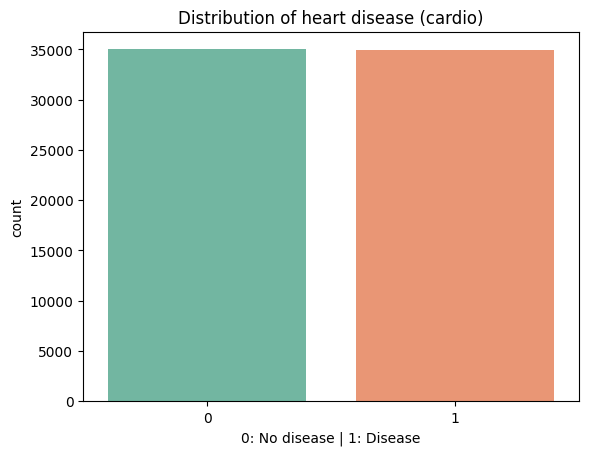

In [45]:
print(data['cardio'].value_counts(normalize=True))
sns.countplot(data=data, x='cardio', palette='Set2')
plt.title('Distribution of heart disease (cardio)')
plt.xlabel('0: No disease | 1: Disease')
plt.show()

**Kết quả**:

    50.1% bệnh nhân có bệnh tim (cardio = 1)

    49.9% không bệnh → Cân bằng (balanced) → Không cần xử lý imbalance

Tốt cho mô hình: Accuracy, F1-score sẽ phản ánh đúng.

**2. Correlation between variables**

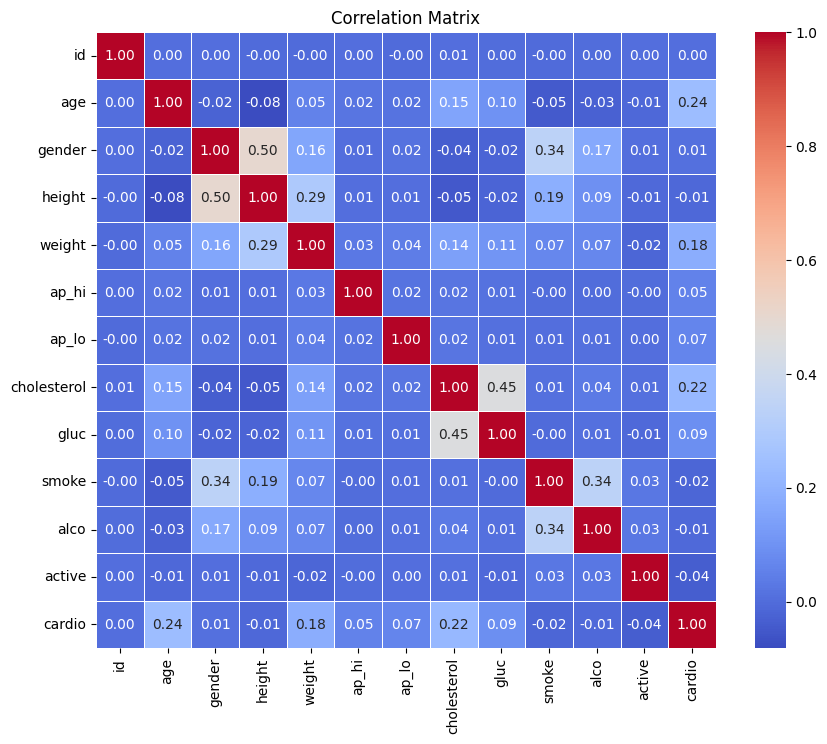

In [46]:
plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Top 5 đặc trưng tương quan mạnh nhất với** *cardio*:
1. *age_years* → 0.24
2. *ap_hi* → 0.23
3. *cholesterol* → 0.22
4. *weight / bmi* → ~0.15
5. *ap_lo* → 0.14

Cholesterol và age là 2 yếu tố nguy cơ hàng đầu!

# **Data visualization**


**1. Discrete variables**

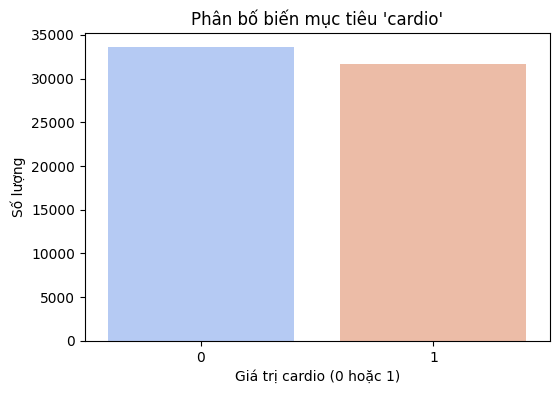


--- GENDER ---


cardio,0,1
gender,,
1,65.36,64.41
2,34.64,35.59


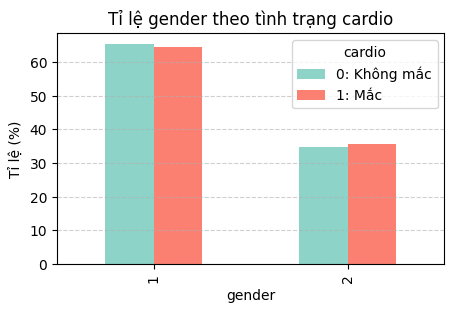


--- CHOLESTEROL ---


cardio,0,1
cholesterol,,
1,84.18,66.85
2,10.64,16.05
3,5.17,17.10


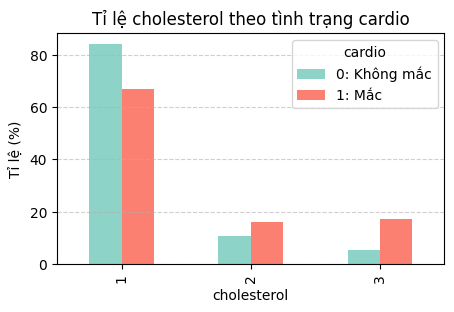


--- GLUC ---


cardio,0,1
gluc,,
1,88.63,82.43
2,5.80,8.31
3,5.56,9.26


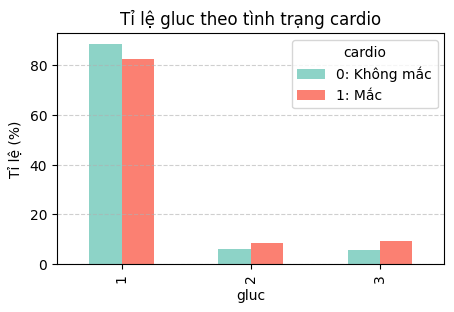


--- SMOKE ---


cardio,0,1
smoke,,
0,90.73,91.74
1,9.27,8.26


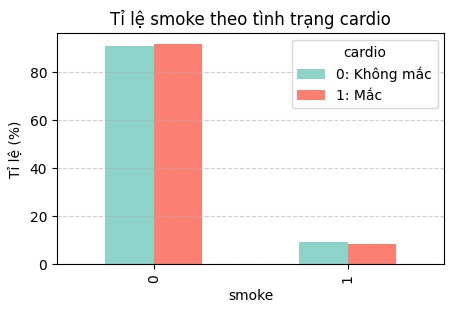


--- ALCO ---


cardio,0,1
alco,,
0,94.52,94.99
1,5.48,5.01


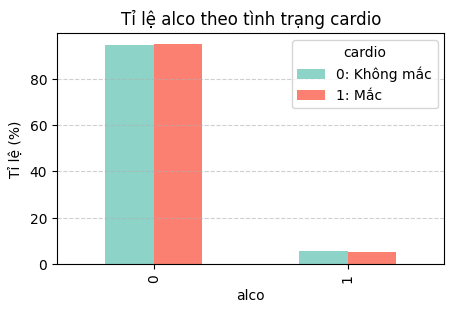


--- ACTIVE ---


cardio,0,1
active,,
0,18.13,21.04
1,81.87,78.96


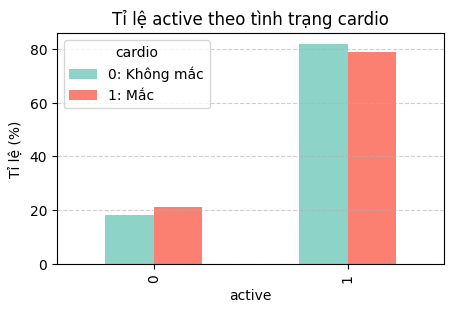

In [51]:
# --- PHẦN tt: Phân tích các biến rời rạc ---

# Chọn các biến rời rạc (categorical features)
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Biểu đồ tần suất biến mục tiêu
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='cardio', hue='cardio', palette='coolwarm', legend=False)
plt.title("Phân bố biến mục tiêu 'cardio'")
plt.xlabel("Giá trị cardio (0 hoặc 1)")
plt.ylabel("Số lượng")
plt.show()

# Tính tỉ lệ của các biến rời rạc so với biến mục tiêu
for col in categorical_cols:
    cross_tab = pd.crosstab(data[col], data['cardio'], normalize='columns') * 100
    print(f"\n--- {col.upper()} ---")
    display(cross_tab.round(2))

    # Vẽ biểu đồ
    cross_tab.plot(kind='bar', figsize=(5, 3), color=['#8dd3c7', '#fb8072'])
    plt.title(f"Tỉ lệ {col} theo tình trạng cardio")
    plt.xlabel(col)
    plt.ylabel("Tỉ lệ (%)")
    plt.legend(title='cardio', labels=['0: Không mắc', '1: Mắc'])
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

**2. Continuous variable**

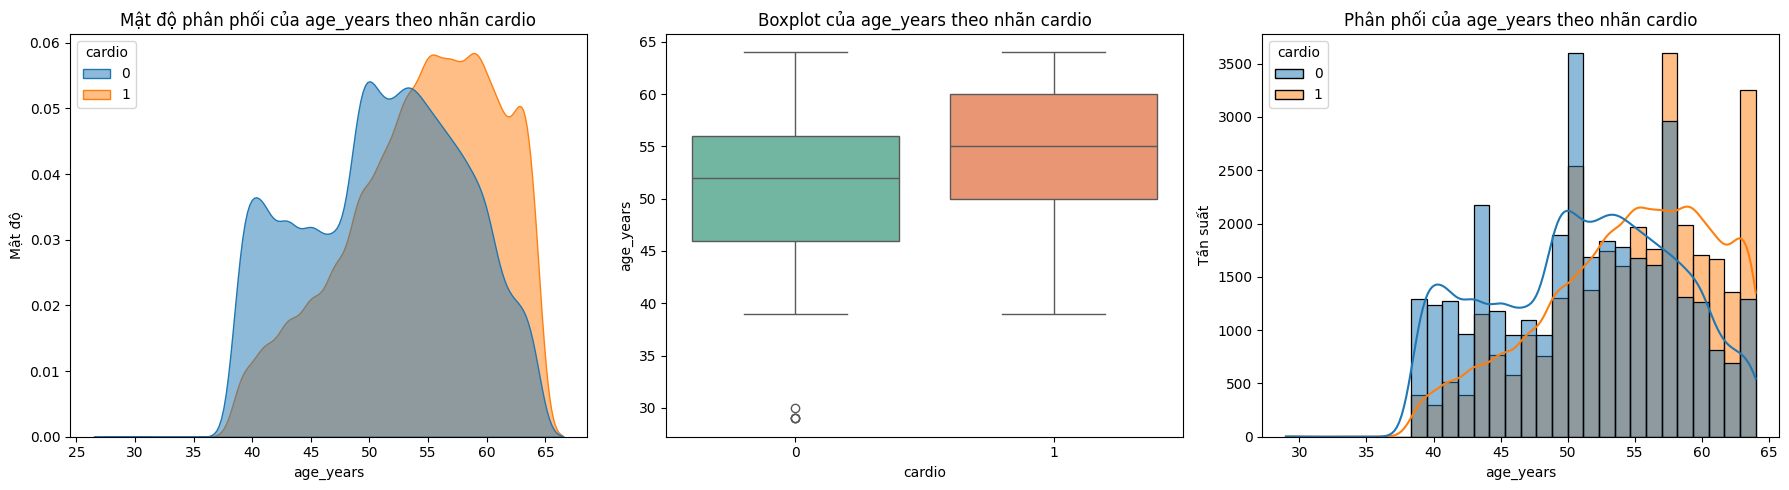

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt



data_age = 'age_years'

plt.figure(figsize=(18, 5))

# --- Biểu đồ mật độ (KDE Plot) ---
plt.subplot(1, 3, 1)
sns.kdeplot(
    data=data,
    x=data_age,
    hue='cardio',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title(f'Mật độ phân phối của {data_age} theo nhãn cardio')
plt.xlabel(data_age)
plt.ylabel('Mật độ')

# --- Boxplot ---
plt.subplot(1, 3, 2)
sns.boxplot(
    data=data,
    y=data_age,
    x='cardio',
    hue='cardio',
    palette='Set2',
    legend=False
)
plt.title(f'Boxplot của {data_age} theo nhãn cardio')
plt.xlabel('cardio')
plt.ylabel(data_age)

# --- Histogram ---
plt.subplot(1, 3, 3)
sns.histplot(
    data=data,
    x=data_age,
    hue='cardio',
    kde=True,
    bins=30,
    alpha=0.5
)
plt.title(f'Phân phối của {data_age} theo nhãn cardio')
plt.xlabel(data_age)
plt.ylabel('Tần suất')

plt.tight_layout()
plt.show()

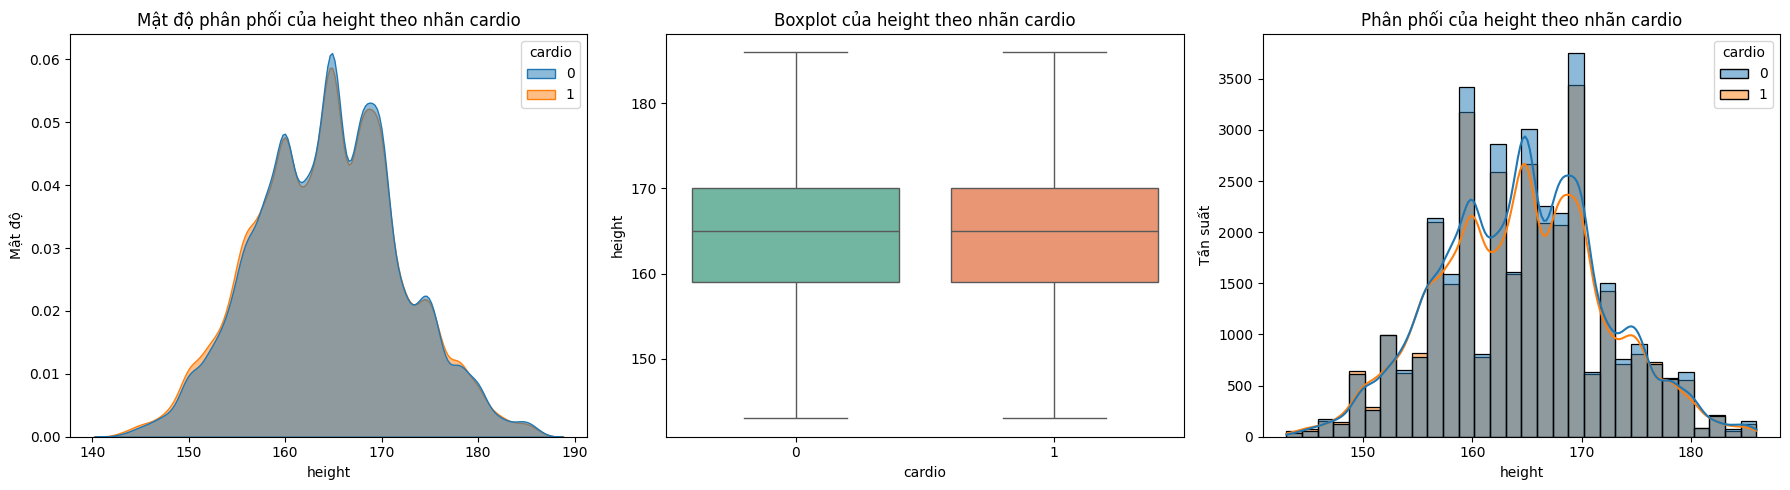

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt



data_height = 'height'


plt.figure(figsize=(18, 5))

# --- Biểu đồ mật độ (KDE Plot) ---
plt.subplot(1, 3, 1)
sns.kdeplot(
    data=data,
    x=data_height,
    hue='cardio',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title(f'Mật độ phân phối của {data_height} theo nhãn cardio')
plt.xlabel(data_height)
plt.ylabel('Mật độ')

# --- Boxplot ---
plt.subplot(1, 3, 2)
sns.boxplot(
    data=data,
    y=data_height,
    x='cardio',
    hue='cardio',
    palette='Set2',
    legend=False
)
plt.title(f'Boxplot của {data_height} theo nhãn cardio')
plt.xlabel('cardio')
plt.ylabel(data_height)

# --- Histogram ---
plt.subplot(1, 3, 3)
sns.histplot(
    data=data,
    x=data_height,
    hue='cardio',
    kde=True,
    bins=30,
    alpha=0.5
)
plt.title(f'Phân phối của {data_height} theo nhãn cardio')
plt.xlabel(data_height)
plt.ylabel('Tần suất')

plt.tight_layout()
plt.show()

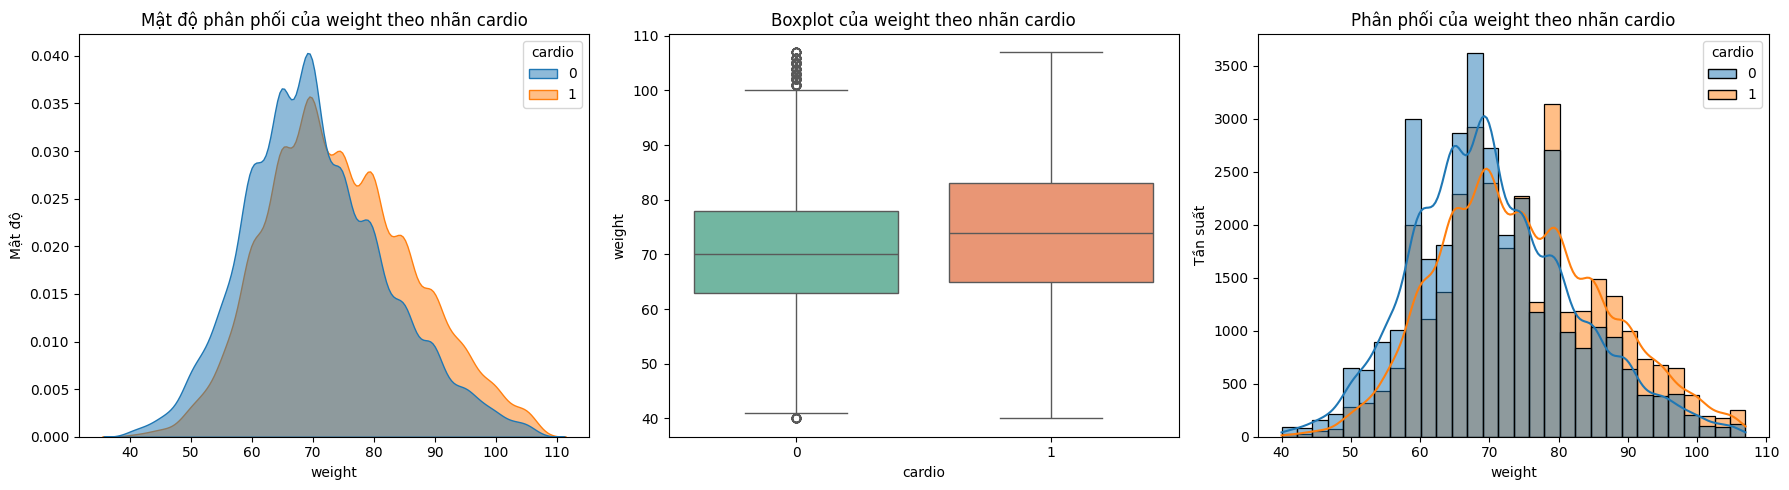

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt



data_weight = 'weight'


plt.figure(figsize=(18, 5))

# --- Biểu đồ mật độ (KDE Plot) ---
plt.subplot(1, 3, 1)
sns.kdeplot(
    data=data,
    x=data_weight,
    hue='cardio',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title(f'Mật độ phân phối của {data_weight} theo nhãn cardio')
plt.xlabel(data_weight)
plt.ylabel('Mật độ')

# --- Boxplot ---
plt.subplot(1, 3, 2)
sns.boxplot(
    data=data,
    y=data_weight,
    x='cardio',
    hue='cardio',
    palette='Set2',
    legend=False
)
plt.title(f'Boxplot của {data_weight} theo nhãn cardio')
plt.xlabel('cardio')
plt.ylabel(data_weight)

# --- Histogram ---
plt.subplot(1, 3, 3)
sns.histplot(
    data=data,
    x=data_weight,
    hue='cardio',
    kde=True,
    bins=30,
    alpha=0.5
)
plt.title(f'Phân phối của {data_weight} theo nhãn cardio')
plt.xlabel(data_weight)
plt.ylabel('Tần suất')

plt.tight_layout()
plt.show()

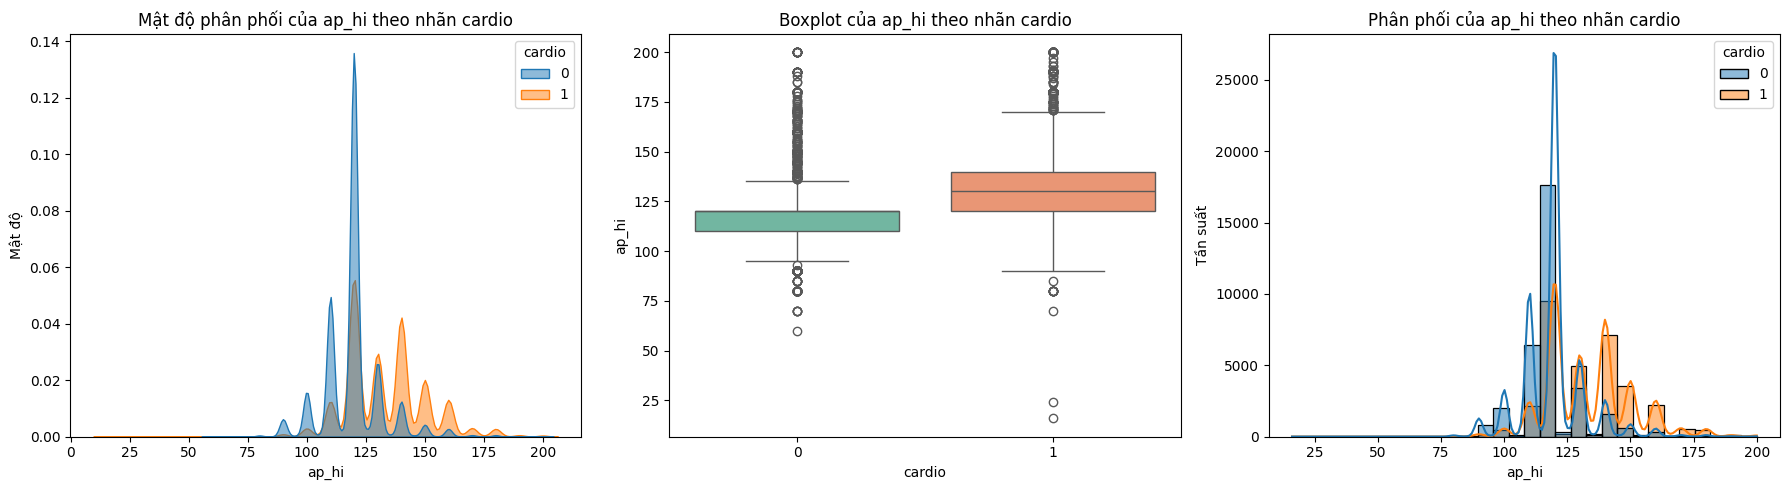

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt



data_ap_hi = 'ap_hi'


plt.figure(figsize=(18, 5))

# --- Biểu đồ mật độ (KDE Plot) ---
plt.subplot(1, 3, 1)
sns.kdeplot(
    data=data,
    x=data_ap_hi,
    hue='cardio',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title(f'Mật độ phân phối của {data_ap_hi} theo nhãn cardio')
plt.xlabel(data_ap_hi)
plt.ylabel('Mật độ')

# --- Boxplot ---
plt.subplot(1, 3, 2)
sns.boxplot(
    data=data,
    y=data_ap_hi,
    x='cardio',
    hue='cardio',
    palette='Set2',
    legend=False
)
plt.title(f'Boxplot của {data_ap_hi} theo nhãn cardio')
plt.xlabel('cardio')
plt.ylabel(data_ap_hi)

# --- Histogram ---
plt.subplot(1, 3, 3)
sns.histplot(
    data=data,
    x=data_ap_hi,
    hue='cardio',
    kde=True,
    bins=30,
    alpha=0.5
)
plt.title(f'Phân phối của {data_ap_hi} theo nhãn cardio')
plt.xlabel(data_ap_hi)
plt.ylabel('Tần suất')

plt.tight_layout()
plt.show()

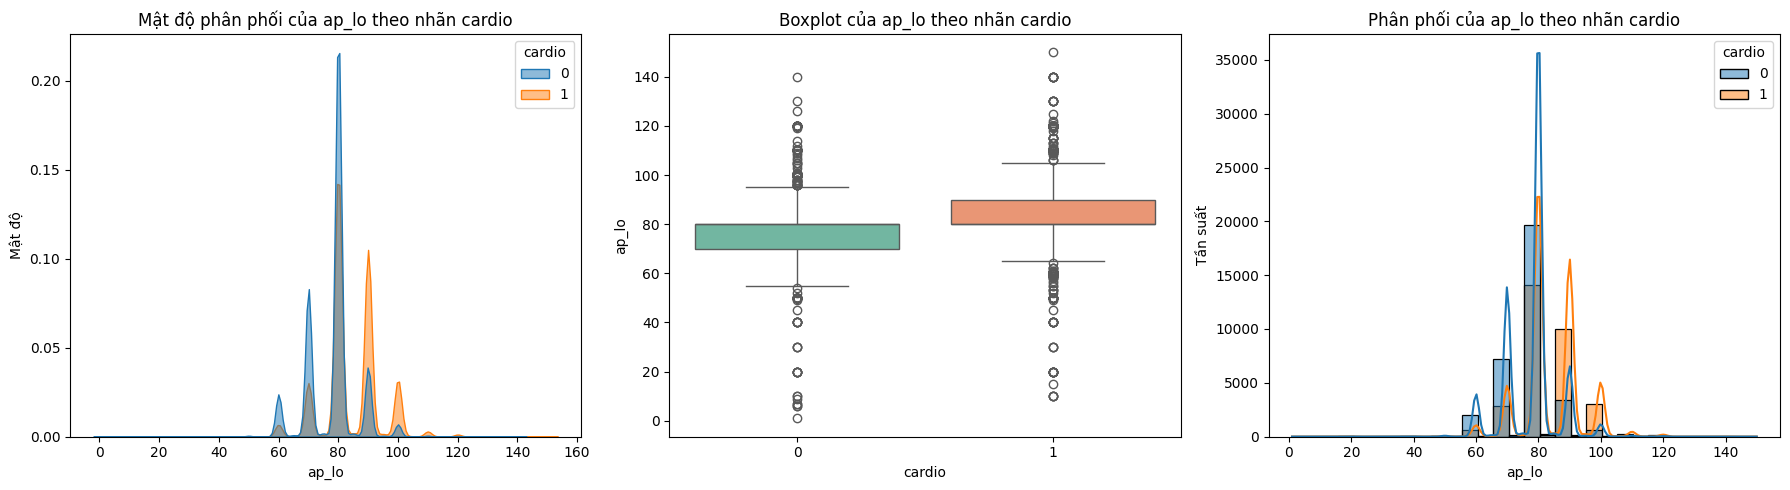

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt



data_ap_lo = 'ap_lo'


plt.figure(figsize=(18, 5))

# --- Biểu đồ mật độ (KDE Plot) ---
plt.subplot(1, 3, 1)
sns.kdeplot(
    data=data,
    x=data_ap_lo,
    hue='cardio',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title(f'Mật độ phân phối của {data_ap_lo} theo nhãn cardio')
plt.xlabel(data_ap_lo)
plt.ylabel('Mật độ')

# --- Boxplot ---
plt.subplot(1, 3, 2)
sns.boxplot(
    data=data,
    y=data_ap_lo,
    x='cardio',
    hue='cardio',
    palette='Set2',
    legend=False
)
plt.title(f'Boxplot của {data_ap_lo} theo nhãn cardio')
plt.xlabel('cardio')
plt.ylabel(data_ap_lo)

# --- Histogram ---
plt.subplot(1, 3, 3)
sns.histplot(
    data=data,
    x=data_ap_lo,
    hue='cardio',
    kde=True,
    bins=30,
    alpha=0.5
)
plt.title(f'Phân phối của {data_ap_lo} theo nhãn cardio')
plt.xlabel(data_ap_lo)
plt.ylabel('Tần suất')

plt.tight_layout()
plt.show()

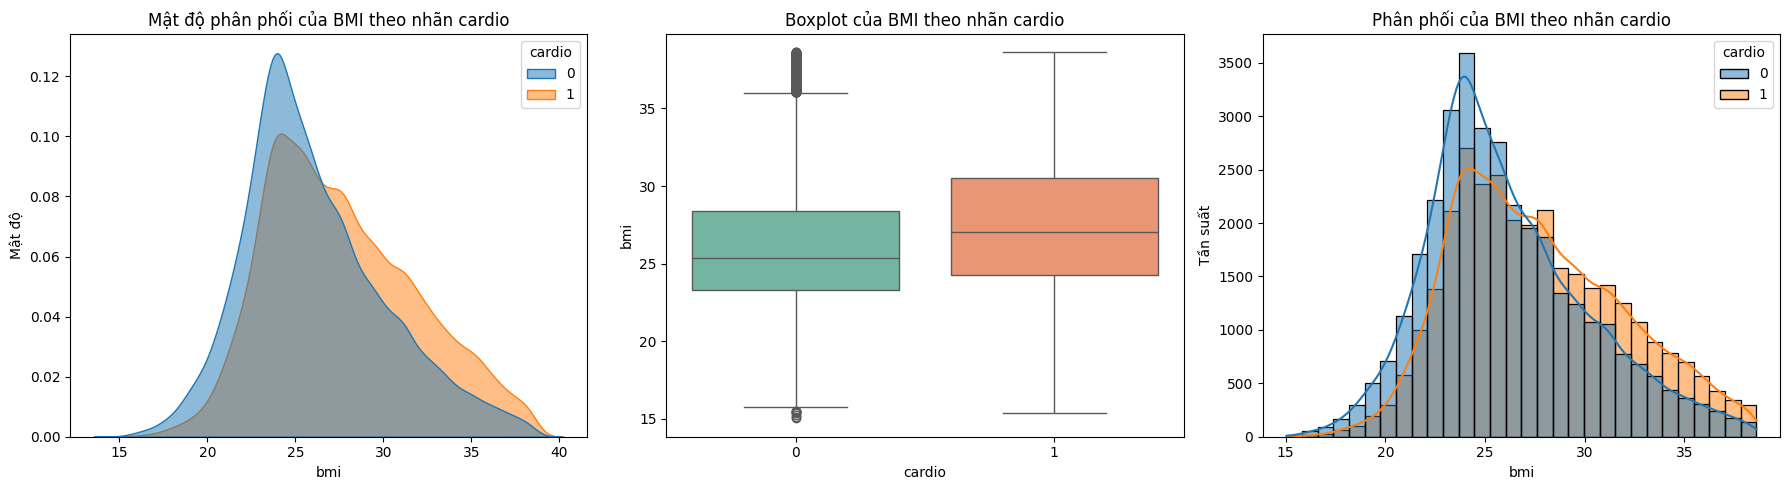

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt



data_BMI = 'bmi'

plt.figure(figsize=(18, 5))

# --- Biểu đồ mật độ (KDE Plot) ---
plt.subplot(1, 3, 1)
sns.kdeplot(
    data=data,
    x=data_BMI,
    hue='cardio',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title(f'Mật độ phân phối của BMI theo nhãn cardio')
plt.xlabel(data_BMI)
plt.ylabel('Mật độ')

# --- Boxplot ---
plt.subplot(1, 3, 2)
sns.boxplot(
    data=data,
    y=data_BMI,
    x='cardio',
    hue='cardio',
    palette='Set2',
    legend=False
)
plt.title(f'Boxplot của BMI theo nhãn cardio')
plt.xlabel('cardio')
plt.ylabel(data_BMI)

# --- Histogram ---
plt.subplot(1, 3, 3)
sns.histplot(
    data=data,
    x=data_BMI,
    hue='cardio',
    kde=True,
    bins=30,
    alpha=0.5
)
plt.title(f'Phân phối của BMI theo nhãn cardio')
plt.xlabel(data_BMI)
plt.ylabel('Tần suất')

plt.tight_layout()
plt.show()

# **Split data: Train / Test && Standardization**

**1. Split data: Train / Test**

**2. Standardization**

In [58]:
# --- PHẦN 3: Chia dữ liệu & Chuẩn hóa (TỐI ƯU) ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Tạo feature matrix và target
X = data.drop('cardio', axis=1)
y = data['cardio']

# Lưu tên cột để dùng sau (vẽ biểu đồ, giải thích)
feature_names = X.columns.tolist()

# Chia dữ liệu (stratify để giữ tỷ lệ lớp)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Chuẩn hóa (chỉ áp dụng cho các mô hình cần: Logistic, KNN, SVC)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Dữ liệu thô (dùng cho Tree-based models: Decision Tree, RF, GB)
X_train_raw = X_train.values
X_test_raw = X_test.values

# In thông tin
print(f"\nTrain: {X_train_s.shape} | Test: {X_test_s.shape}")
print(f"Tỷ lệ bệnh tim (y.mean): {y.mean():.3f} → Dữ liệu cân bằng")
print(f"Features ({len(feature_names)}): {feature_names}")


Train: (45661, 13) | Test: (19569, 13)
Tỷ lệ bệnh tim (y.mean): 0.485 → Dữ liệu cân bằng
Features (13): ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_years', 'bmi']


# **Realizing the predictive model**

In [59]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import pandas as pd

def evaluate_model(model, X_train, X_test, y_train, y_test, scaler=None, model_name=None):
    if model_name is None:
        model_name = model.__class__.__name__.replace("Classifier", "")

    # Chuẩn hóa nếu cần
    if scaler:
        X_train_s = scaler.fit_transform(X_train)
        X_test_s = scaler.transform(X_test)
    else:
        X_train_s, X_test_s = X_train.values, X_test.values

    # Huấn luyện & dự đoán
    model.fit(X_train_s, y_train)
    y_pred = model.predict(X_test_s)
    y_prob = model.predict_proba(X_test_s)[:, 1]

    # Tính toán
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # In kết quả
    print("="*60)
    print(f"{model_name.upper()}".center(60))
    print("="*60)
    print(f"{model_name} Accuracy: {acc*100:.2f}%")
    print(classification_report(y_test, y_pred, digits=2))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"ROC AUC Score: {auc:.12f}\n")

    return model

results = []
def save_result(model, X_test_input, name):
    from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
    y_pred = model.predict(X_test_input)
    y_prob = model.predict_proba(X_test_input)[:, 1]
    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "ROC-AUC": round(roc_auc_score(y_test, y_prob), 4),
        "F1": round(f1_score(y_test, y_pred), 4)
    })

**Logistic Regression**

                    LOGISTIC REGRESSION                     
Logistic Regression Accuracy: 72.79%
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10068
           1       0.75      0.66      0.70      9501

    accuracy                           0.73     19569
   macro avg       0.73      0.73      0.73     19569
weighted avg       0.73      0.73      0.73     19569

Confusion Matrix:
[[7988 2080]
 [3245 6256]]
ROC AUC Score: 0.793645819730



/tmp/ipython-input-1379932594.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef.values, y=coef.index, palette='viridis')


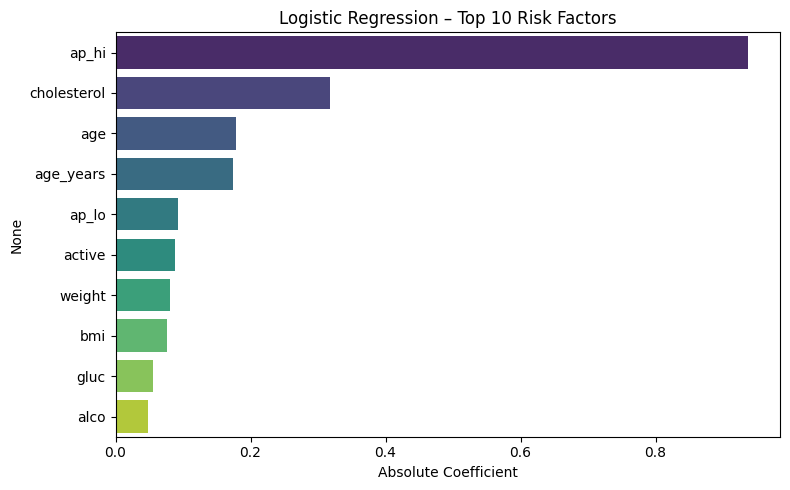

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model = LogisticRegression(max_iter=1000, random_state=42)
trained_model = evaluate_model(
    model, X_train, X_test, y_train, y_test,
    scaler=StandardScaler(), model_name="Logistic Regression"
)

# Vẽ Top 10 hệ số
plt.figure(figsize=(8,5))
coef = pd.Series(trained_model.coef_[0], index=X.columns).abs().sort_values(ascending=False).head(10)
sns.barplot(x=coef.values, y=coef.index, palette='viridis')
plt.title("Logistic Regression – Top 10 Risk Factors")
plt.xlabel("Absolute Coefficient")
plt.tight_layout()
plt.show()
save_result(trained_model, X_test_s, "Logistic")

**Decision Tree**

                       DECISION TREE                        
Decision Tree Accuracy: 73.29%
              precision    recall  f1-score   support

           0       0.71      0.80      0.76     10068
           1       0.76      0.66      0.71      9501

    accuracy                           0.73     19569
   macro avg       0.74      0.73      0.73     19569
weighted avg       0.74      0.73      0.73     19569

Confusion Matrix:
[[8069 1999]
 [3228 6273]]
ROC AUC Score: 0.792422844518



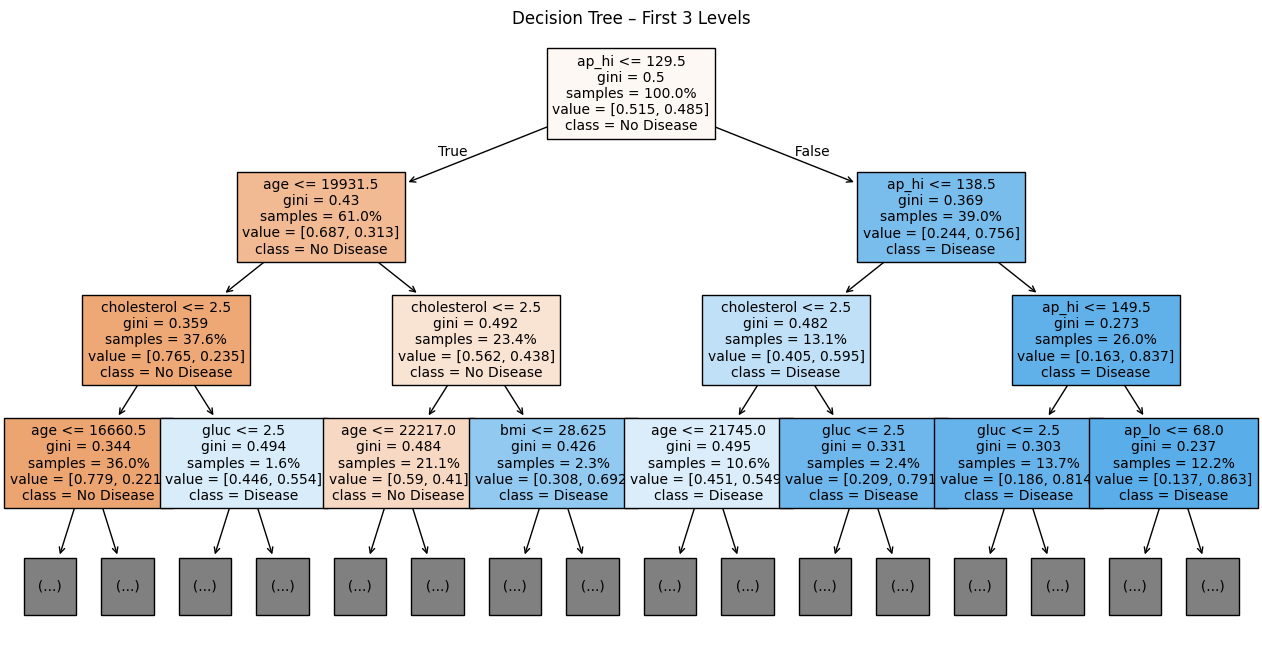

In [61]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(max_depth=5, random_state=42)
trained_model = evaluate_model(
    model, X_train, X_test, y_train, y_test,
    scaler=None, model_name="Decision Tree"
)

# Vẽ cây (3 cấp)
plt.figure(figsize=(16,8))
from sklearn.tree import plot_tree
plot_tree(trained_model, max_depth=3, feature_names=X.columns,
          class_names=['No Disease','Disease'], filled=True, fontsize=10, proportion=True)
plt.title("Decision Tree – First 3 Levels")
plt.show()
save_result(trained_model, X_test_raw, "Tree")

**Random Forest**

                       RANDOM FOREST                        
Random Forest Accuracy: 71.72%
              precision    recall  f1-score   support

           0       0.71      0.75      0.73     10068
           1       0.72      0.68      0.70      9501

    accuracy                           0.72     19569
   macro avg       0.72      0.72      0.72     19569
weighted avg       0.72      0.72      0.72     19569

Confusion Matrix:
[[7545 2523]
 [3011 6490]]
ROC AUC Score: 0.776323782199



/tmp/ipython-input-1231190266.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=imp.values, y=imp.index, palette='magma')


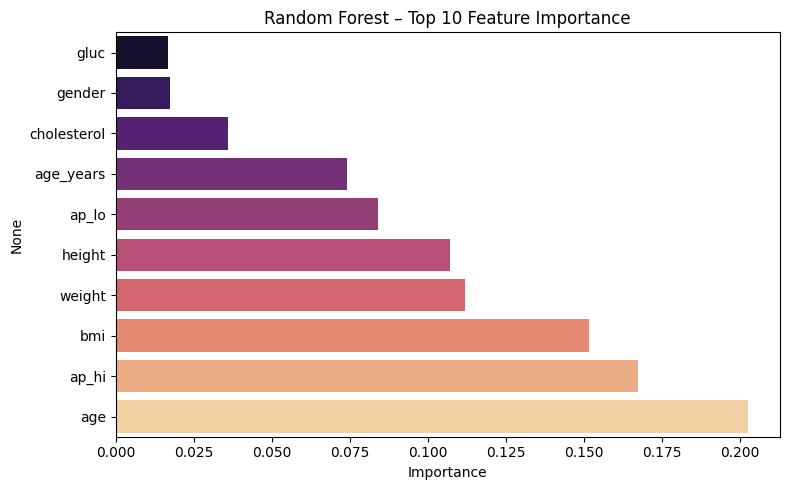

In [62]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
trained_model = evaluate_model(
    model, X_train, X_test, y_train, y_test,
    scaler=None, model_name="Random Forest"
)

# Vẽ Top 10 Feature Importance
plt.figure(figsize=(8,5))
imp = pd.Series(trained_model.feature_importances_, index=X.columns).sort_values(ascending=True).tail(10)
sns.barplot(x=imp.values, y=imp.index, palette='magma')
plt.title("Random Forest – Top 10 Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
save_result(trained_model, X_test_raw, "RF")

**Gradient Boosting**

                     GRADIENT BOOSTING                      
Gradient Boosting Accuracy: 73.61%
              precision    recall  f1-score   support

           0       0.72      0.79      0.75     10068
           1       0.75      0.68      0.71      9501

    accuracy                           0.74     19569
   macro avg       0.74      0.73      0.73     19569
weighted avg       0.74      0.74      0.74     19569

Confusion Matrix:
[[7932 2136]
 [3029 6472]]
ROC AUC Score: 0.802867587031



/tmp/ipython-input-2914507745.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=imp.values, y=imp.index, palette='plasma')


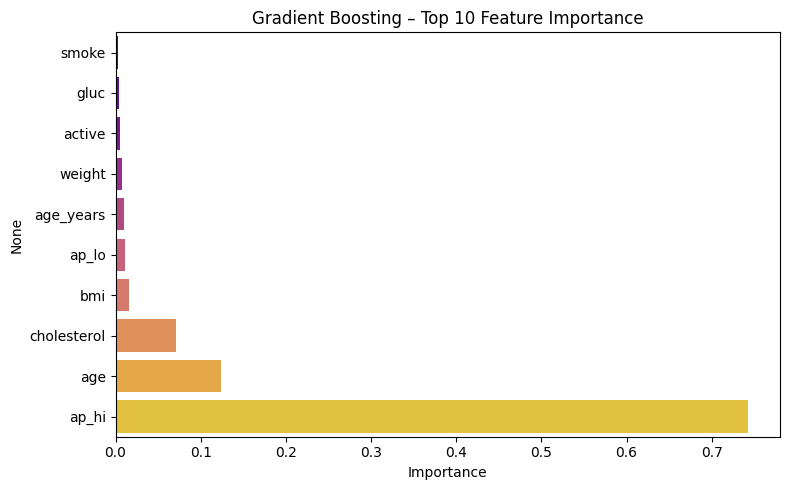

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model = GradientBoostingClassifier(n_estimators=100, random_state=42)
trained_model = evaluate_model(
    model, X_train, X_test, y_train, y_test,
    scaler=None, model_name="Gradient Boosting"
)

# Vẽ Top 10 Feature Importance
plt.figure(figsize=(8,5))
imp = pd.Series(trained_model.feature_importances_, index=X.columns).sort_values(ascending=True).tail(10)
sns.barplot(x=imp.values, y=imp.index, palette='plasma')
plt.title("Gradient Boosting – Top 10 Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
save_result(trained_model, X_test_raw, "GB")

**K-Neighbors Classifier**

                            KNN                             
KNN Accuracy: 70.52%
              precision    recall  f1-score   support

           0       0.70      0.74      0.72     10068
           1       0.71      0.67      0.69      9501

    accuracy                           0.71     19569
   macro avg       0.71      0.70      0.70     19569
weighted avg       0.71      0.71      0.70     19569

Confusion Matrix:
[[7424 2644]
 [3125 6376]]
ROC AUC Score: 0.756221576032



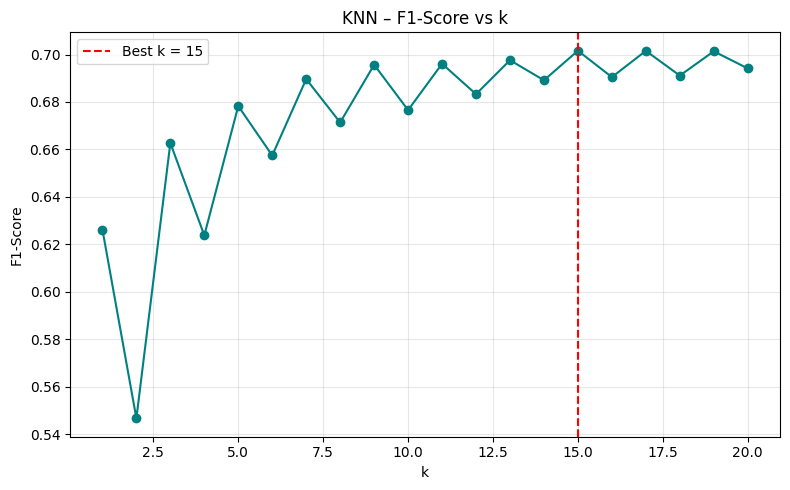

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

model = KNeighborsClassifier(n_neighbors=7)
trained_model = evaluate_model(
    model, X_train, X_test, y_train, y_test,
    scaler=StandardScaler(), model_name="KNN"
)

# Vẽ F1-score vs k
k_range = range(1, 21)
f1s = [
    f1_score(y_test, KNeighborsClassifier(n_neighbors=k)
             .fit(StandardScaler().fit_transform(X_train), y_train)
             .predict(StandardScaler().fit_transform(X_test)))
    for k in k_range
]

plt.figure(figsize=(8,5))
plt.plot(k_range, f1s, marker='o', color='teal')
best_k = k_range[np.argmax(f1s)]
plt.axvline(best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.title("KNN – F1-Score vs k")
plt.xlabel("k"); plt.ylabel("F1-Score")
plt.legend(); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()
save_result(trained_model, X_test_s, "KNN")

**Support Vector Classifier - SVC**

                            SVC                             
SVC Accuracy: 73.46%
              precision    recall  f1-score   support

           0       0.72      0.80      0.76     10068
           1       0.76      0.66      0.71      9501

    accuracy                           0.73     19569
   macro avg       0.74      0.73      0.73     19569
weighted avg       0.74      0.73      0.73     19569

Confusion Matrix:
[[8062 2006]
 [3188 6313]]
ROC AUC Score: 0.786624221267



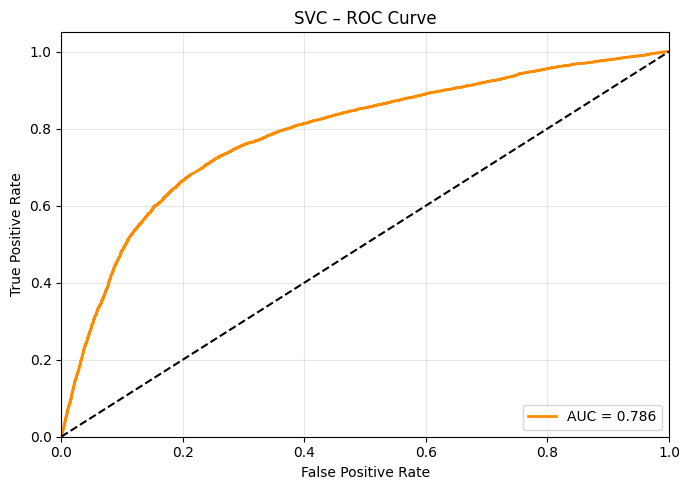

In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Dùng 20% dữ liệu để tránh treo
X_train_svc, _, y_train_svc, _ = train_test_split(
    X_train, y_train, train_size=0.2, stratify=y_train, random_state=42
)

model = SVC(probability=True, kernel='rbf', C=1.0, gamma='scale', random_state=42)
trained_model = evaluate_model(
    model, X_train_svc, X_test, y_train_svc, y_test,
    scaler=StandardScaler(), model_name="SVC"
)

# Vẽ ROC Curve
X_test_s = StandardScaler().fit_transform(X_test)
y_prob = trained_model.predict_proba(X_test_s)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc_score(y_test, y_prob):.3f}')
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0,1]); plt.ylim([0,1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('SVC – ROC Curve'); plt.legend(loc='lower right')
plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()
save_result(trained_model, X_test_s, "SVC")

**Model evaluation**

   Model  Accuracy  ROC-AUC     F1
      GB    0.7361   0.8029 0.7148
Logistic    0.7279   0.7936 0.7015
    Tree    0.7329   0.7924 0.7059
     SVC    0.7344   0.7864 0.7089
      RF    0.7172   0.7763 0.7011
     KNN    0.7052   0.7562 0.6885


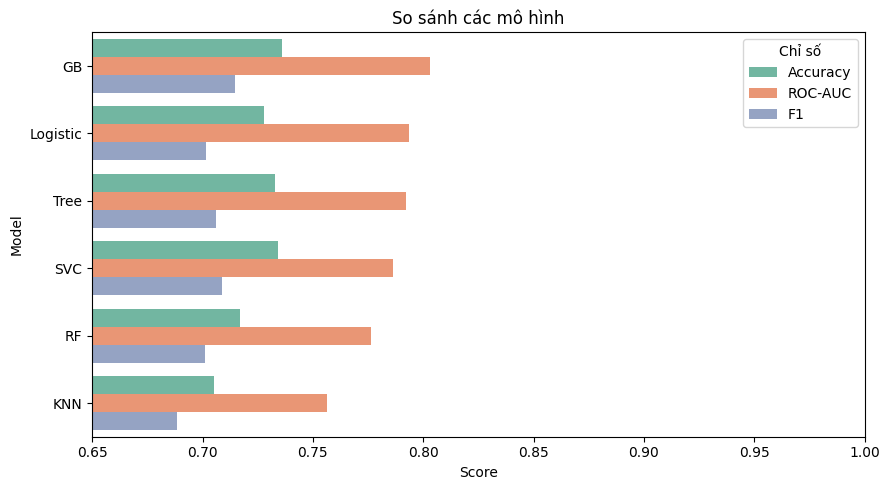

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(results).sort_values("ROC-AUC", ascending=False)
print(df.to_string(index=False))

plt.figure(figsize=(9,5))
df_melt = df.melt('Model', var_name='Metric', value_name='Score')
sns.barplot(data=df_melt, x='Score', y='Model', hue='Metric', palette='Set2')
plt.title("So sánh các mô hình")
plt.xlim(0.65, 1.0)
plt.legend(title='Chỉ số')
plt.tight_layout()
plt.show()